In [102]:
!hostname

rubensolozabal-MSI


In [103]:
import os
os.chdir('/home/solozabal/Documents/projects/TFBind')

In [104]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_csv('datasets/ETS1/dataset_ETS1_encoded.csv')

In [106]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor
0,AA,3,7.320168,TAATGCCGGAAATGT,ACATTTCCGGCAATA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
1,AA,4,7.246614,TAGAGCCGGAAATGT,ACATTTCCGGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
2,AA,5,7.260331,TAGTACCGGAAATGT,ACATTTCCGGAACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
3,AA,6,6.110860,TAGTGACGGAAATGT,ACATTTCCGACACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
4,AA,7,5.445802,TAGTGCAGGAAATGT,ACATTTCCAGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
...,...,...,...,...,...,...,...
1256,gg,11,5.207028,TAGTGCCGGAgATGT,ACATgTCCGGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
1257,gg,12,5.394492,TAGTGCCGGAAgTGT,ACAgTTCCGGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
1258,gg,13,5.534682,TAGTGCCGGAAAgGT,ACgTTTCCGGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."
1259,gg,14,6.930534,TAGTGCCGGAAATgT,AgATTTCCGGCACTA,"[['M', 'A', 'D', 'A'], ['A', 'D', 'A', 'M'], [...","[['x', 'A', 'n', 'A'], ['A', 'n', 'A', 'x'], [..."


In [107]:
# Add Category column based on presence of specific letters in Change
def categorize_change(change: str) -> str:
    s = str(change).upper()
    mapping = {
        'A': 'WC',
        'C': 'WC',
        'G': 'WC',
        'T': 'WC',
        'U': 'dUPT',
        'X': '5mC',
        'a': '7dA',
        'g': '7dG',
        'I': 'I',
        'M': '6mA',
        'D': 'D',
    }

    # Determine labels per character without losing case information
    chars = list(str(change))
    labels = [mapping.get(ch, mapping.get(ch.upper(), 'WC')) for ch in chars]
    non_wc = [lbl for lbl in labels if lbl != 'WC']

    if len(non_wc) == 0:
        return "none"
    elif len(non_wc) == 1:
        return non_wc[0]
    else:
        return "both"

df["Category"] = df["Change"].apply(categorize_change)

In [108]:
import pandas as pd
from ast import literal_eval
from src.encode import one_hot_encode_grooves



def parse_literal(value):
    return value if isinstance(value, list) else literal_eval(value)

df["Groove_major"] = df["Groove_major"].map(parse_literal)
df["Groove_minor"] = df["Groove_minor"].map(parse_literal)
df["Groove_major_OH"], df["Groove_minor_OH"] = zip(
    *df.apply(lambda r: one_hot_encode_grooves(r["Groove_major"], r["Groove_minor"]), axis=1)
)



In [109]:
df

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH
0,AA,3,7.320168,TAATGCCGGAAATGT,ACATTTCCGGCAATA,"[[M, A, D, A], [A, D, A, M], [A, D, D, A], [M,...","[[x, A, n, A], [A, n, A, x], [A, n, n, A], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
1,AA,4,7.246614,TAGAGCCGGAAATGT,ACATTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [A,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [A,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
2,AA,5,7.260331,TAGTACCGGAAATGT,ACATTTCCGGAACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
3,AA,6,6.110860,TAGTGACGGAAATGT,ACATTTCCGACACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
4,AA,7,5.445802,TAGTGCAGGAAATGT,ACATTTCCAGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
...,...,...,...,...,...,...,...,...,...,...
1256,gg,11,5.207028,TAGTGCCGGAgATGT,ACATgTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
1257,gg,12,5.394492,TAGTGCCGGAAgTGT,ACAgTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
1258,gg,13,5.534682,TAGTGCCGGAAAgGT,ACgTTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."
1259,gg,14,6.930534,TAGTGCCGGAAATgT,AgATTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0..."


In [110]:
# Create X_train by concatenating Groove_major_OH and Groove_minor_OH along axis=1

X = np.stack([
    np.concatenate([np.asarray(mj, dtype=np.int8), np.asarray(mn, dtype=np.int8)], axis=1)
    for mj, mn in zip(df["Groove_major_OH"], df["Groove_minor_OH"])
], axis=0).astype(np.float32)

df["encoded_sequence"] = list(X)

In [111]:
df.iloc[0]["encoded_sequence"].shape

(15, 8, 4)

In [112]:
# Parameters
split=0.3

from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, test_size=split, random_state=0)

In [113]:
# Create training and testing datasets
X_train = np.stack(df_train["encoded_sequence"].to_numpy(), axis=0)
y_train = df_train["ln(I)"].to_numpy()

X_test = np.stack(df_test["encoded_sequence"].to_numpy(), axis=0)
y_test = df_test["ln(I)"].to_numpy()

In [114]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((882, 15, 8, 4), (882,), (379, 15, 8, 4), (379,))

In [115]:
# Reshape X for XGBoost into 2 dimensions
n_samples, seq_length, n_features, n_encoding = X_train.shape
X_train = X_train.reshape((n_samples, seq_length * n_features * n_encoding))

X_test = X_test.reshape((X_test.shape[0], seq_length * n_features * n_encoding))

In [116]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [117]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [118]:
xgbr.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [119]:
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)

Training score:  0.9437471144443778


In [120]:
kfold = KFold(n_splits=5, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.78


In [121]:
ypred = xgbr.predict(X_test)
mae = mean_absolute_error(y_test, ypred)
mse = mean_squared_error(y_test, ypred)
print("MAE: %.4f" % mae)

MAE: 0.2436


In [122]:
df_test['y_pred'] = ypred

In [123]:
df_test

,Change,Position,ln(I),Plus_strand,Minus_strand,Groove_major,Groove_minor,Category,Groove_major_OH,Groove_minor_OH,encoded_sequence,y_pred
5,AA,8,5.244965,TAGTGCCAGAAATGT,ACATTTCAGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",5.247290
432,GI,6,6.399106,TAGTGGCGGAAATGT,ACATTTCCGICACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",I,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",6.050995
52,AI,3,7.240317,TAATGCCGGAAATGT,ACATTTCCGGCAITA,"[[M, A, D, A], [A, D, A, M], [A, D, A, A], [M,...","[[x, A, n, A], [A, n, A, x], [A, n, n, A], [x,...",I,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",7.208533
989,XD,4,7.607266,TAGXGCCGGAAATGT,ACATTTCCGGCDCTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",7.212433
186,CG,7,7.123130,TAGTGCCGGAAATGT,ACATTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",none,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",6.548478
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,XT,15,8.343889,TAGTGCCGGAAATGX,TCATTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",5mC,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",7.654796
906,UD,12,5.616533,TAGTGCCGGAAUTGT,ACADTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",both,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",5.731709
1187,gG,7,5.428310,TAGTGCgGGAAATGT,ACATTTCCGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",7dG,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",5.393400
434,GI,8,7.699928,TAGTGCCGGAAATGT,ACATTTCIGGCACTA,"[[M, A, D, A], [A, D, A, M], [A, A, D, n], [M,...","[[x, A, n, A], [A, n, A, x], [A, D, A, x], [x,...",I,"[[[0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0...","[[[0, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0...","[[[0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0], ...",5.328438


In [124]:
from sklearn.metrics import r2_score
y_test = df_test['ln(I)']
y_pred = df_test['y_pred']


r2 = r2_score(y_pred, y_test)
r2

0.7879768458909209

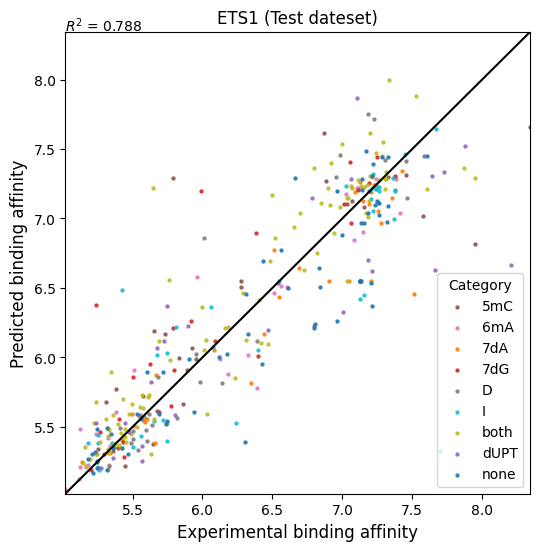

In [125]:
from matplotlib import pyplot as plt

# Ensure Category exists (uses existing categorize_change if needed)
if "Category" not in df_test.columns:
    df_test["Category"] = df_test["Change"].apply(categorize_change)

# Color map per category
colors = {
    "none": "#1f77b4",
    "I": "#17becf",
    "D": "#7f7f7f",
    "6mA": "#e377c2",
    "7dA": "#ff7f0e",
    "7dG": "#d62728",
    "dUPT": "#9467bd",
    "5mC": "#8c564b",
    "both": "#bcbd22",
}

plt.figure(figsize=(6,6))

# Scatter per category
for cat, g in df_test.groupby("Category"):
    plt.scatter(g["ln(I)"], g["y_pred"], s=18, marker='.', alpha=0.85,
                label=cat, c=colors.get(cat, None))

plt.xlabel('Experimental binding affinity', fontsize=12)
plt.ylabel('Predicted binding affinity', fontsize=12)

p1 = max(max(ypred), max(y_test))
p2 = min(min(ypred), min(y_test))
plt.xlim([p2, p1])
plt.ylim([p2, p1])
plt.plot([p2, p1], [p2, p1], 'k-')

plt.annotate("$R^2$ = {:.3f}".format(r2), (p2, p1))
plt.legend(loc='lower right', title="Category")
plt.title('ETS1 (Test dateset)', fontsize=12)
plt.show()
# plt.savefig("/l/users/ruben.solozabal/projects/weizmann/output.pdf", bbox_inches='tight')

/tmp/ipykernel_3102752/1897951721.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats = df_test.groupby("Category").apply(


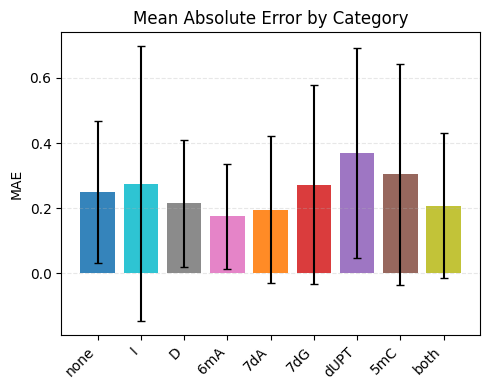

In [127]:
# Bar plots of prediction error per Category with deviation

# Compute per-category errors (MAE and Bias) and their std
stats = df_test.groupby("Category").apply(
    lambda d: pd.Series({
        "MAE": np.mean(np.abs(d["y_pred"] - d["ln(I)"])),
        "MAE_std": np.std(np.abs(d["y_pred"] - d["ln(I)"])),
        "Bias": np.mean(d["y_pred"] - d["ln(I)"]),
        "Bias_std": np.std(d["y_pred"] - d["ln(I)"]),
        "N": len(d)
    })
)

# Use existing color mapping if available; otherwise create a simple one
if "colors" in globals():
    order = [c for c in colors.keys() if c in stats.index]
else:
    order = sorted(stats.index.tolist())
    cmap = plt.get_cmap("tab10")
    colors = {cat: cmap(i % 10) for i, cat in enumerate(order)}

stats = stats.reindex(order)

# Plot MAE with std and Bias with std
fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharex=False)

# MAE plot
axes.bar(
    range(len(order)),
    stats["MAE"].values,
    yerr=stats["MAE_std"].values,
    color=[colors[c] for c in order],
    capsize=3,
    alpha=0.9
)
axes.set_xticks(range(len(order)))
axes.set_xticklabels(order, rotation=45, ha="right")
axes.set_title("Mean Absolute Error by Category")
axes.set_ylabel("MAE")
axes.grid(axis="y", linestyle="--", alpha=0.3)


plt.tight_layout()
plt.show()